In [26]:
import pandas as pd
import csv
import numpy as np

In [27]:
hyb_JA = pd.read_csv('markus/model_mean_for_markus_hyb_JA.txt', header=0, sep="t")

In [233]:
def read_data_no2(file="markus/model_mean_for_markus_hyb_JA.txt"):
    f = open(file, "r")
    time_series = []
    
    for _ in range(1):
    
        next(f)
    for line in f:
        dd = f.readline().split()
        
        list1=[float(x) for x in dd]
        time_series.append(np.array(list1).reshape((-1,1)))
    dd = np.array(time_series)
    ddd = []
    for i in range(dd.shape[0]-1):
        for j in range(dd[1].shape[0]):
            ddd.append(dd[i][j][0])
    
    return np.array(ddd)

In [234]:
hyb_JA = read_data_no2(file="markus/model_mean_for_markus_hyb_JA.txt")
hyb_SO = read_data_no2(file="markus/model_mean_for_markus_hyb_SO.txt")
hyb_ND = read_data_no2(file="markus/model_mean_for_markus_hyb_ND.txt")

mix_JA = read_data_no2(file="markus/model_mean_for_markus_mix_JA.txt")
mix_SO = read_data_no2(file="markus/model_mean_for_markus_mix_SO.txt")
mix_ND = read_data_no2(file="markus/model_mean_for_markus_mix_ND.txt")

sat_JA = read_data_no2(file="markus/sat_mean_for_markus_hyb_JA.txt")
sat_SO = read_data_no2(file="markus/sat_mean_for_markus_hyb_ND.txt")
sat_ND = read_data_no2(file="markus/sat_mean_for_markus_hyb_SO.txt")



In [235]:
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

In [254]:
# calculate Pearson's correlation
corr_mix_JA, _ = pearsonr(sat_JA, mix_JA)
inds = np.where(~np.isnan(sat_SO))
corr_mix_SO, _ = pearsonr(sat_SO[inds], mix_SO[inds])
inds = np.where(~np.isnan(mix_ND))
corr_mix_ND, _ = pearsonr(sat_ND[inds], mix_ND[inds])

corr_hyb_JA, _ = pearsonr(sat_JA, hyb_JA)
inds = np.where(~np.isnan(sat_SO))
corr_hyb_SO, _ = pearsonr(sat_SO[inds], hyb_SO[inds])
inds = np.where(~np.isnan(hyb_ND))
corr_hyb_ND, _ = pearsonr(sat_ND[inds], hyb_ND[inds])






In [270]:
np.std(sat_JA)

0.786887754369736

In [255]:
from numpy import ma
import mpl_toolkits.axisartist.grid_finder as GF
import mpl_toolkits.axisartist.floating_axes as FA

In [420]:
def Taylor_diag(series, names, name, ref_name, tit):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: series     - dict with all time series (lists) to analyze  
               series[0]  - is the observation, the reference by default.
    """
    corr,std ={},{}
    for i in series.keys():
        corr[i] = ma.corrcoef(series[0],series[i])[1,0]
        std[i] = ma.std(series[i])/ma.std(series[0])
       
    ref =  ma.std(series[0])
    #print corr
    
    rlocs = np.concatenate((np.arange(0,-10,-0.25),[-0.95,-0.99],np.arange(0,10,0.25),[0.95,0.99]))
    str_rlocs = np.concatenate((np.arange(0,10,0.25),[0.95,0.99],np.arange(0,10,0.25),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    tlocs2 =  np.arange(-10,11,0.5)      
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax = 1.6

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi/2, # 1st quadrant
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    
   
    fig = plt.figure(figsize=(10,5), dpi=300)
    #fig = plt.subplot(1,3,1)
    ax = FA.FloatingSubplot(fig, 111, grid_helper=ghelper)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Correlation Coefficient")

    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation")

    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
    #ax.axis["right"].label.set_text("Standard Deviation")

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi)
    r = np.zeros_like(t) + ref
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi))

    
    rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    CS =ax.contour(ts, rs,rms, colors="g")
    plt.clabel(CS, inline=1, fontsize=10)
    

    ax.plot(np.arccos(0.9999),ref,'r',marker='*',ls='', ms=15, label=ref_name)
    aux = range(1,len(corr))
    #del aux[ref]


    
    colors = plt.matplotlib.cm.jet(np.linspace(0,1,len(corr)))
    
    for i in aux:
        ax.plot(np.arccos(corr[i]), std[i],c=colors[i],alpha =0.7,ms=15,marker='o',label=" %s" %names[i])
        #ax.text(np.arccos(corr[i]), std[i],"%s"%i, fontsize=12)
    legend(bbox_to_anchor=(1.5, 1),prop=dict(size='large'),loc='best')
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.title(tit,fontsize=20)
    plt.savefig(name, dpi=300, bbox_inches = 'tight', pad_inches = 0)
    return

In [421]:
import numpy as np
from pylab import *


/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos


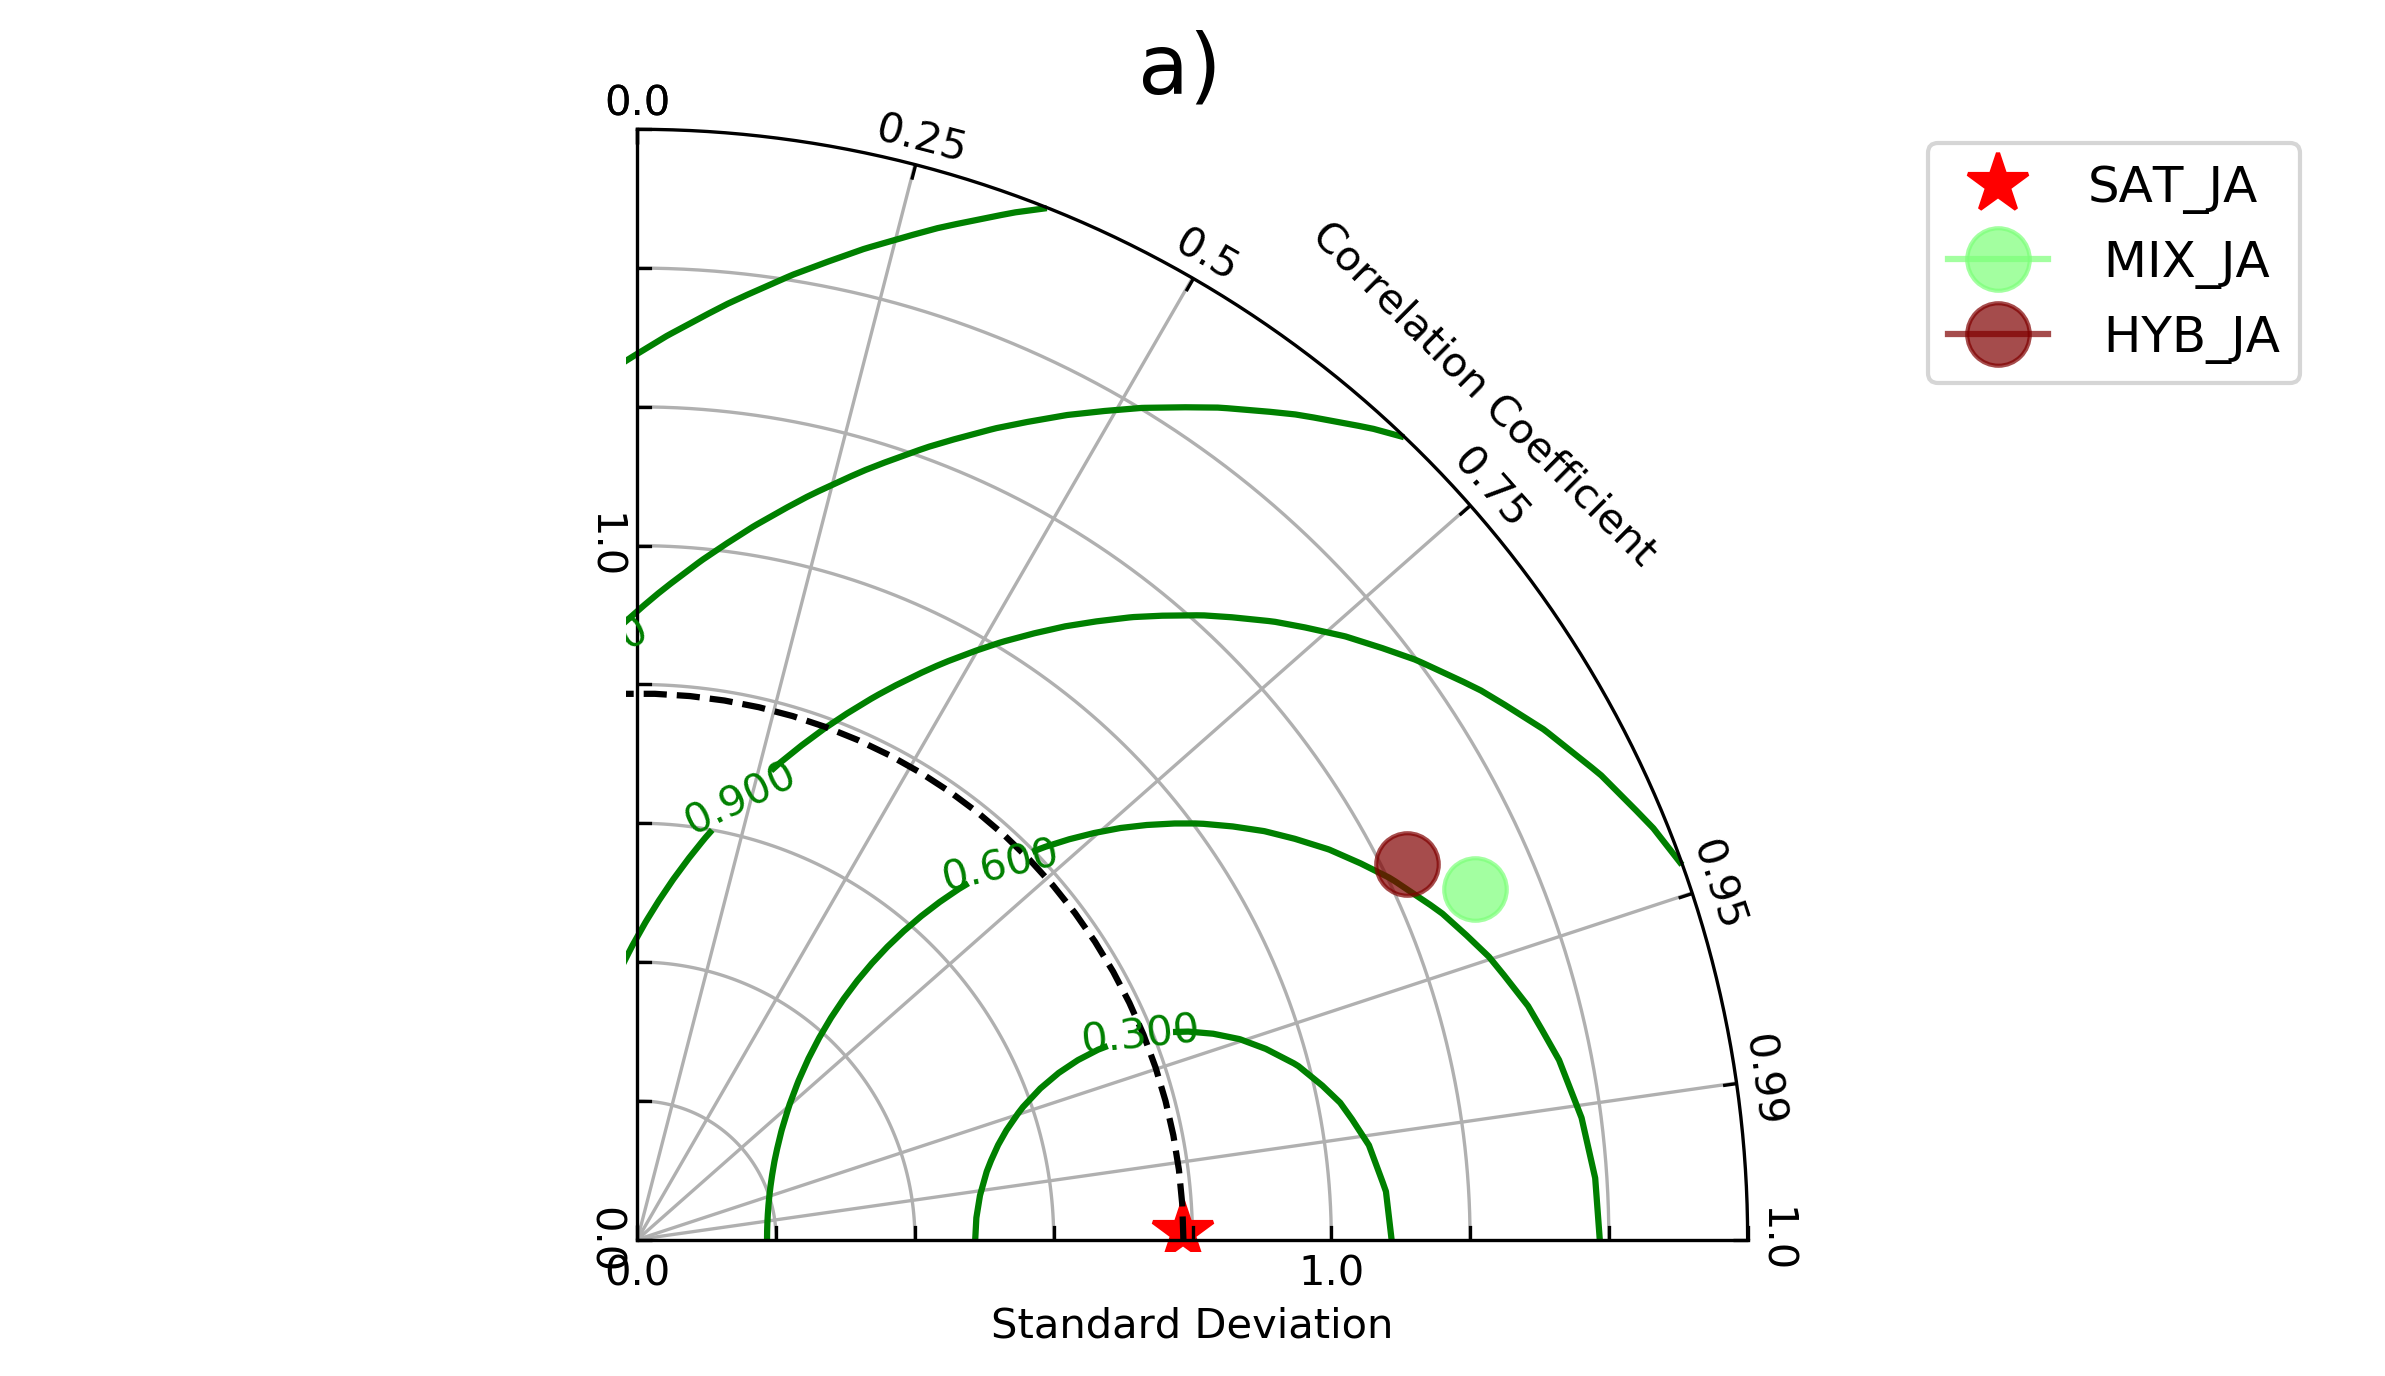

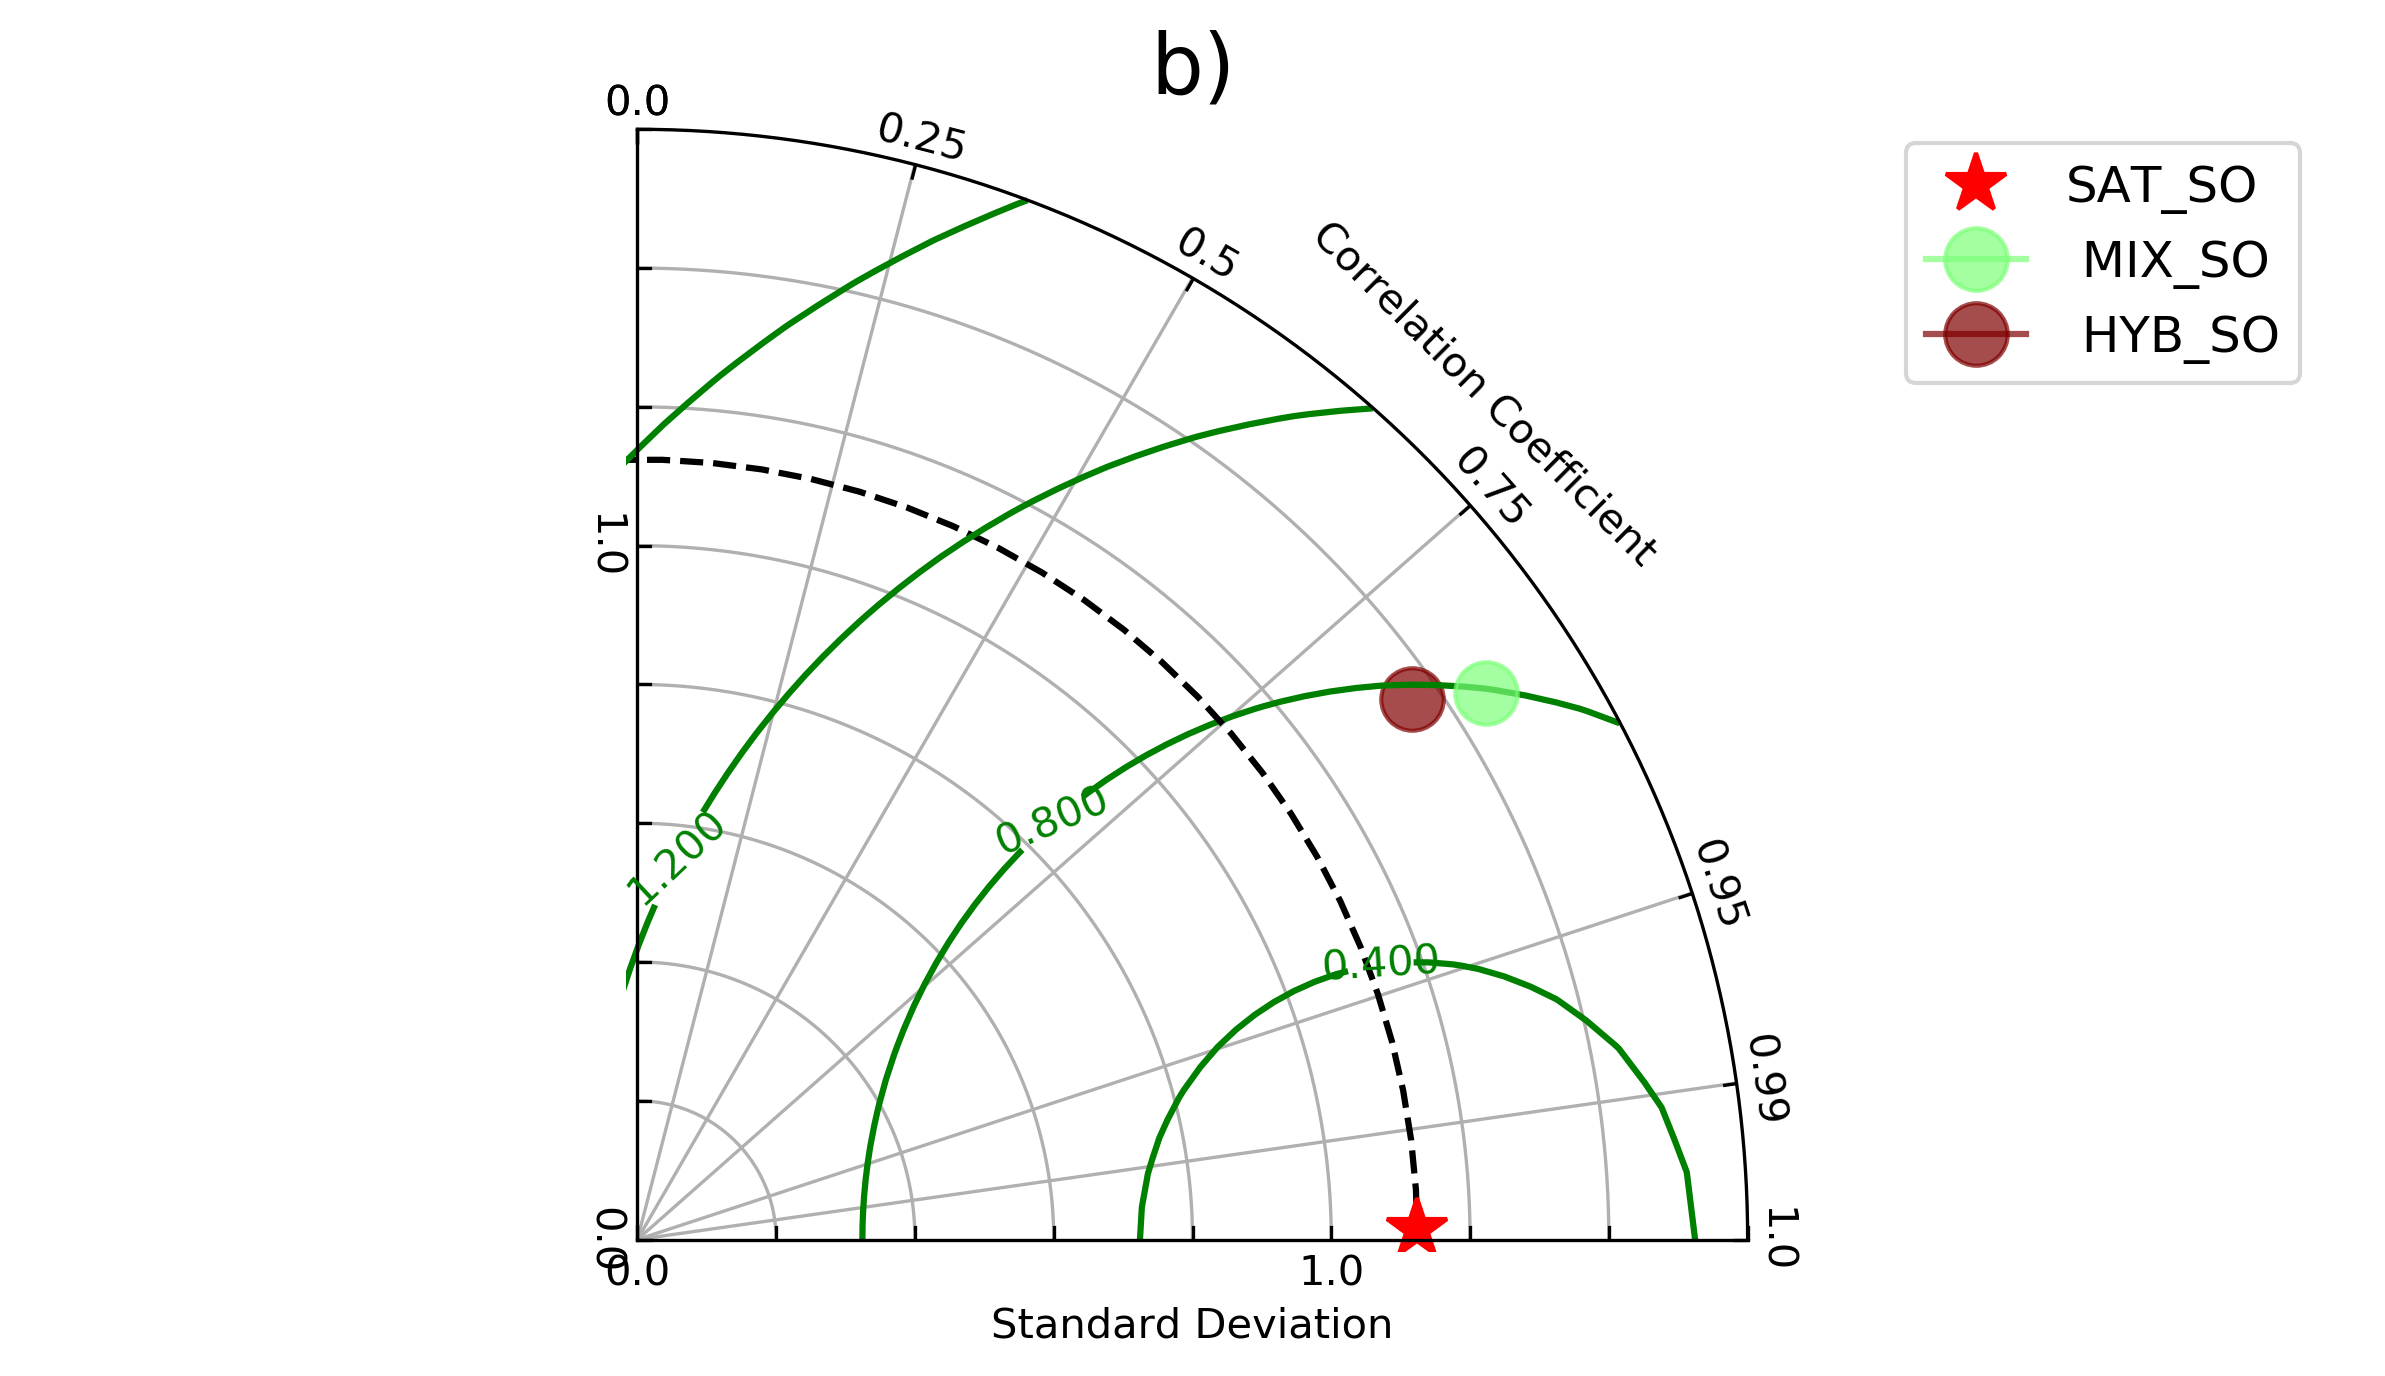

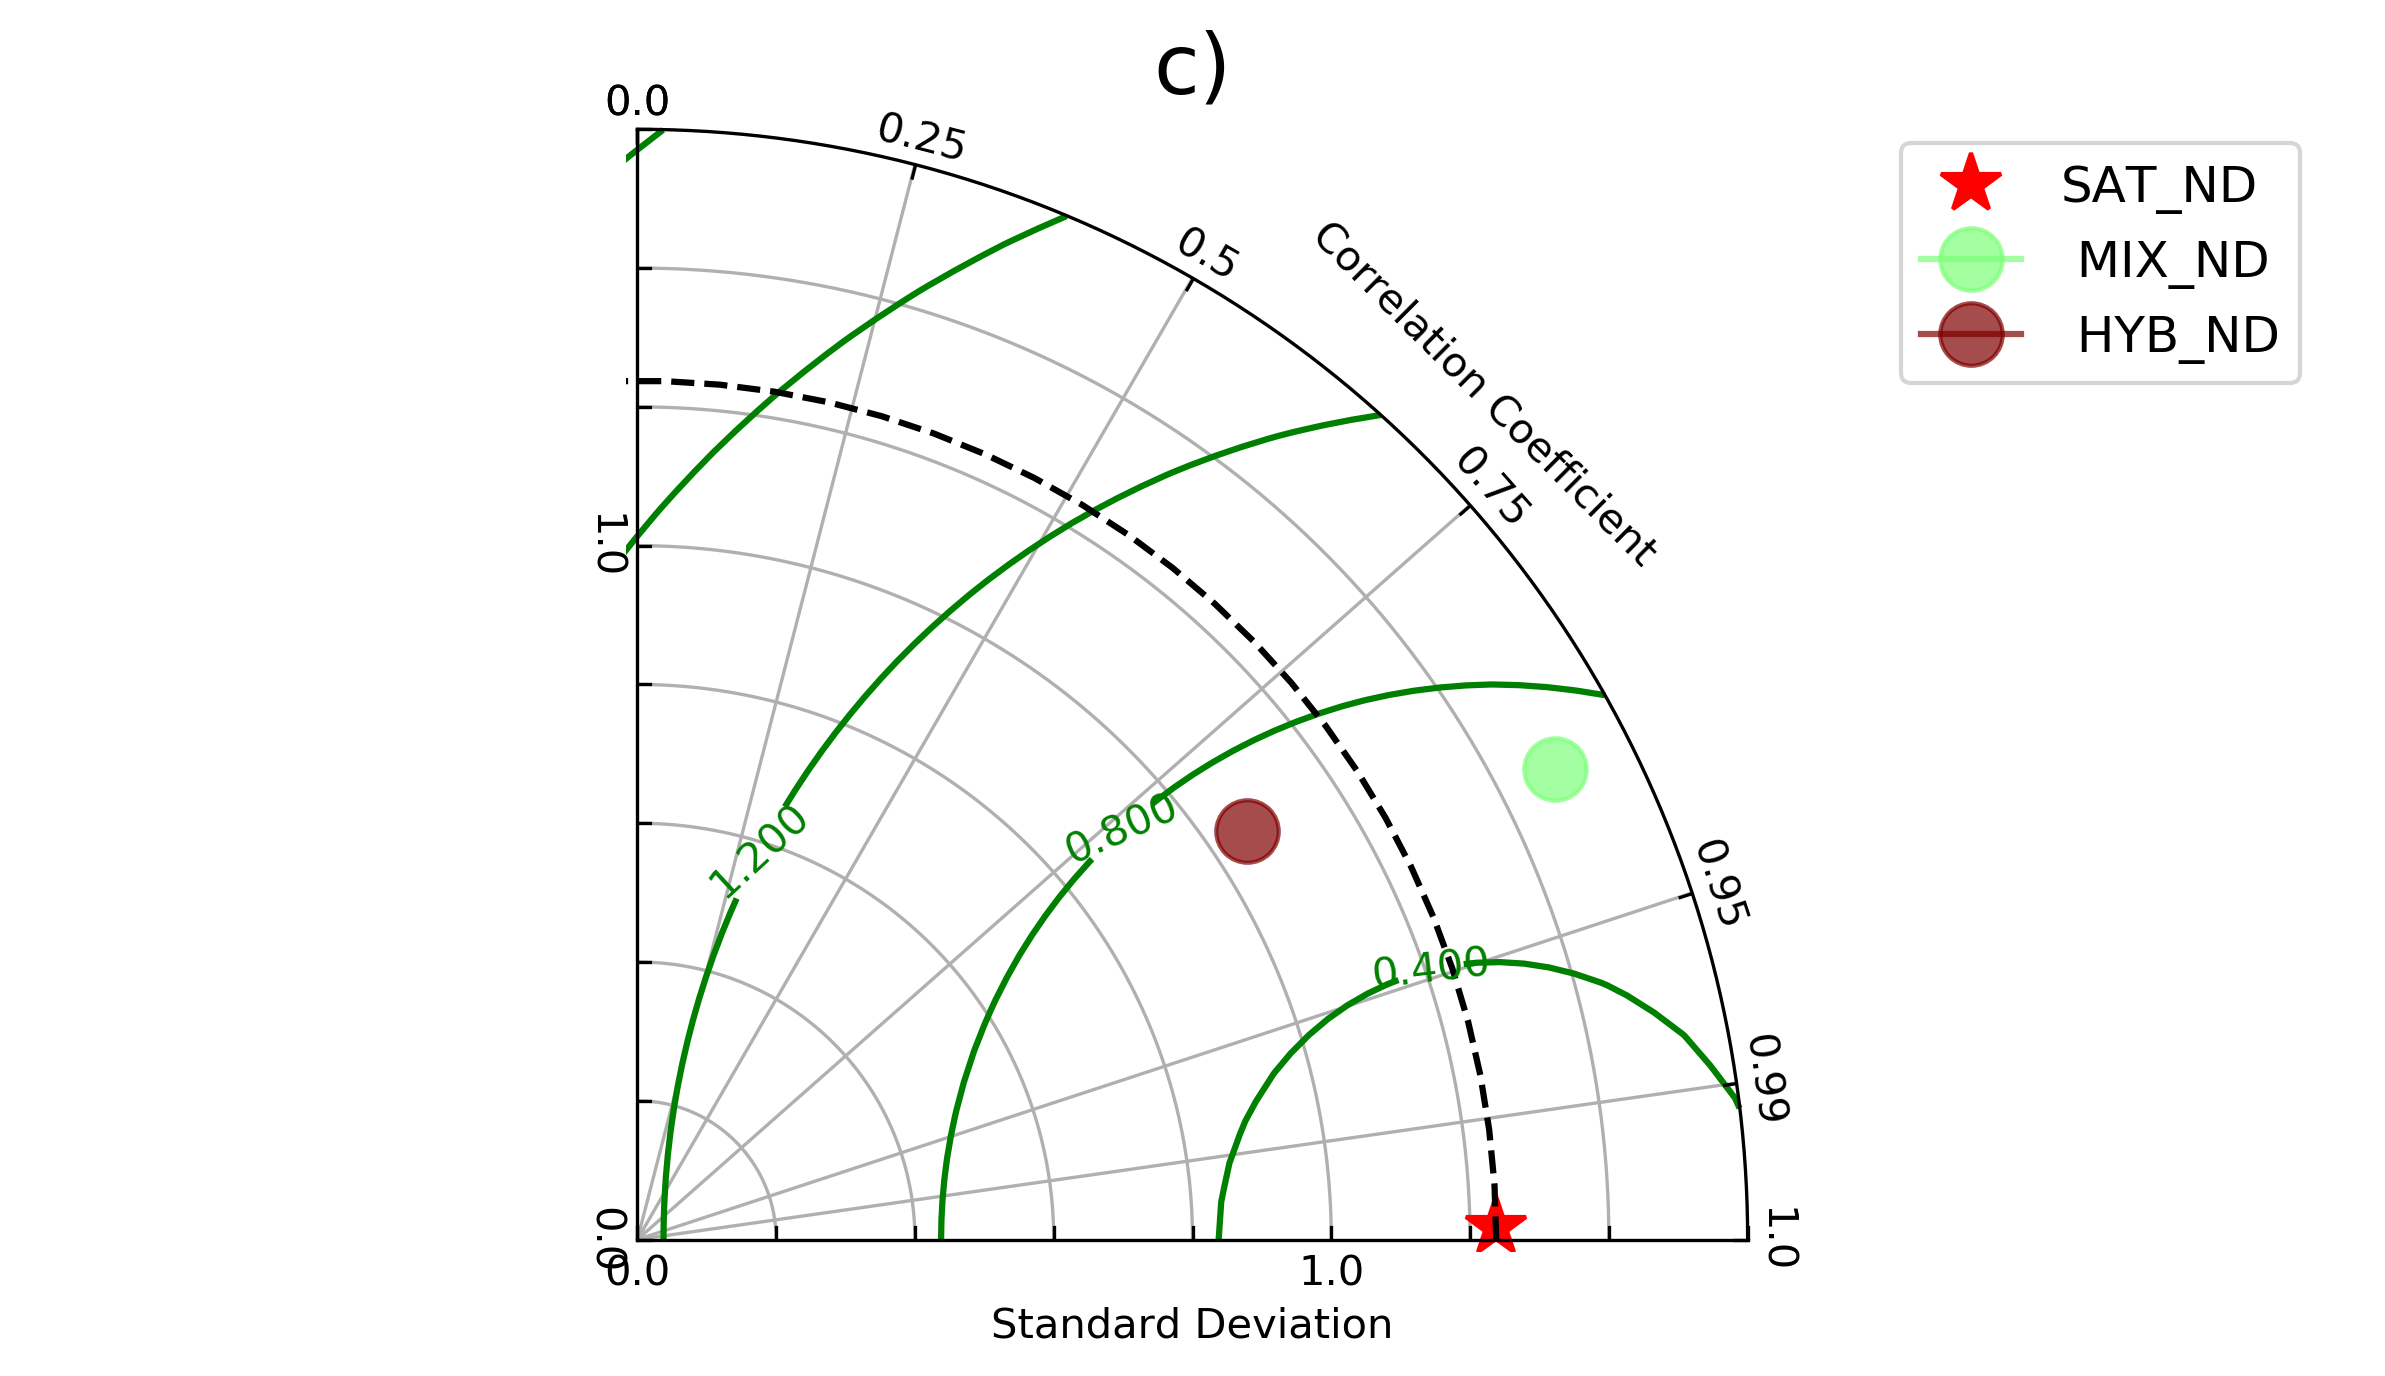

In [422]:
series ={}
series[0] = sat_JA  # the first term will be always the reference signal 
series[1]= mix_JA
series[2]= hyb_JA
Taylor_diag(series,['sat_JA','MIX_JA','HYB_JA'], name = "taylor_JA.png", ref_name="SAT_JA", tit="a) ")
series ={}
inds = np.where(~np.isnan(sat_SO))
series[0] = sat_SO[inds]  # the first term will be always the reference signal 
series[1]= mix_SO[inds] 
series[2]= hyb_SO[inds] 
Taylor_diag(series,['sat_SO','MIX_SO','HYB_SO'], name = "taylor_SO.png", ref_name="SAT_SO", tit="b)")

series ={}
inds = np.where(~np.isnan(hyb_ND))
series[0] = sat_ND[inds]  # the first term will be always the reference signal 
series[1]= mix_ND[inds] 
series[2]= hyb_ND[inds] 
Taylor_diag(series,['sat_ND','MIX_ND','HYB_ND'], name = "taylor_ND.png", ref_name="SAT_ND",tit="c)")

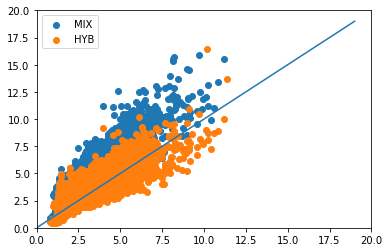

In [423]:
plt.scatter(series[0],series[1],label='MIX')
plt.scatter(series[0],series[2],label='HYB')
plt.xlim([0,20])
plt.ylim([0,20])
plt.legend()
plt.plot(range(20),range(20))
#plt.plot(series[1],'b-o',alpha=.4)
#plt.plot(series[2],'r-o',alpha=.4)